In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score,davies_bouldin_score, calinski_harabasz_score


In [63]:
data=pd.read_csv('/content/A24_Released_Movies_2022_09_26.csv')
df=pd.DataFrame(data)
#df=df.drop(columns=['director'])
df.head(10)

,title,release_date,genre,director,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime,MPAA_rating
0,20th Century Women,12/28/2016,"Comedy, Drama",Mike Mills,7000000.0,5664764.0,1550042.0,7214806.0,119,R
1,A Ghost Story,7/7/2017,"Drama, Fantasy",David Lowery,100000.0,1596371.0,355312.0,1951683.0,92,R
2,A Glimpse Inside the Mind of Charles Swan III,2/8/2013,Comedy,Roman Coppola,NaN,45350.0,165215.0,210565.0,86,R
3,A Most Violent Year,12/31/2014,"Crime, Drama",J.C. Chandor,20000000.0,5749134.0,6257936.0,12007070.0,125,R
4,A Prayer Before Dawn,8/10/2018,"Action, Drama, Crime",Jean-Stéphane Sauvaire,NaN,14453.0,944430.0,958883.0,116,R
5,After Yang,3/4/2022,"Sci-Fi, Drama",Kogonada,NaN,46872.0,614514.0,661386.0,96,PG
6,American Honey,9/30/2016,"Drama, Adventure",Andrea Arnold,3500000.0,663246.0,1627403.0,2290649.0,163,R
7,Amy,7/3/2015,"Documentary, Biographical, Music",Asif Kapadia,3400000.0,8413144.0,15293242.0,23706386.0,128,R
8,Backstabbing For Beginners,4/27/2018,"Thriller, Political",Per Fly,8000000.0,NaN,367000.0,367000.0,108,R
9,Barely Lethal,5/29/2015,"Action, Comedy",Kyle Newman,15000000.0,6075.0,927772.0,933847.0,96,PG-13


In [64]:
duplicates=df.duplicated().sum()
print(duplicates)

0


In [65]:
null=df.isnull().sum()
df = df.dropna()
print(df)

                                   title release_date  \
0                     20th Century Women   12/28/2016   
1                          A Ghost Story     7/7/2017   
3                    A Most Violent Year   12/31/2014   
6                         American Honey    9/30/2016   
7                                    Amy     7/3/2015   
9                          Barely Lethal    5/29/2015   
12                                Climax     3/1/2019   
13                           C'mon C'mon   11/19/2021   
15                           Dark Places     8/7/2015   
17                          Eighth Grade    7/13/2018   
20     Everything Everywhere All At Once    3/25/2022   
21                            Ex Machina    4/10/2015   
24                        First Reformed    5/18/2018   
25                             Free Fire    4/21/2017   
29                             Good Time    8/11/2017   
30                            Green Room    4/15/2016   
31                            H

In [66]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'genre' column
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])
df.head(5)

<ipython-input-66-d05bd1638ab7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre_encoded'] = label_encoder.fit_transform(df['genre'])


,title,release_date,genre,director,budget,domestic_revenue,international_revenue,worldwide_revenue,runtime,MPAA_rating,genre_encoded
0,20th Century Women,12/28/2016,"Comedy, Drama",Mike Mills,7000000.0,5664764.0,1550042.0,7214806.0,119,R,5
1,A Ghost Story,7/7/2017,"Drama, Fantasy",David Lowery,100000.0,1596371.0,355312.0,1951683.0,92,R,22
3,A Most Violent Year,12/31/2014,"Crime, Drama",J.C. Chandor,20000000.0,5749134.0,6257936.0,12007070.0,125,R,12
6,American Honey,9/30/2016,"Drama, Adventure",Andrea Arnold,3500000.0,663246.0,1627403.0,2290649.0,163,R,17
7,Amy,7/3/2015,"Documentary, Biographical, Music",Asif Kapadia,3400000.0,8413144.0,15293242.0,23706386.0,128,R,15


<ipython-input-67-2f5c56717af0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_matrix=df.corr()


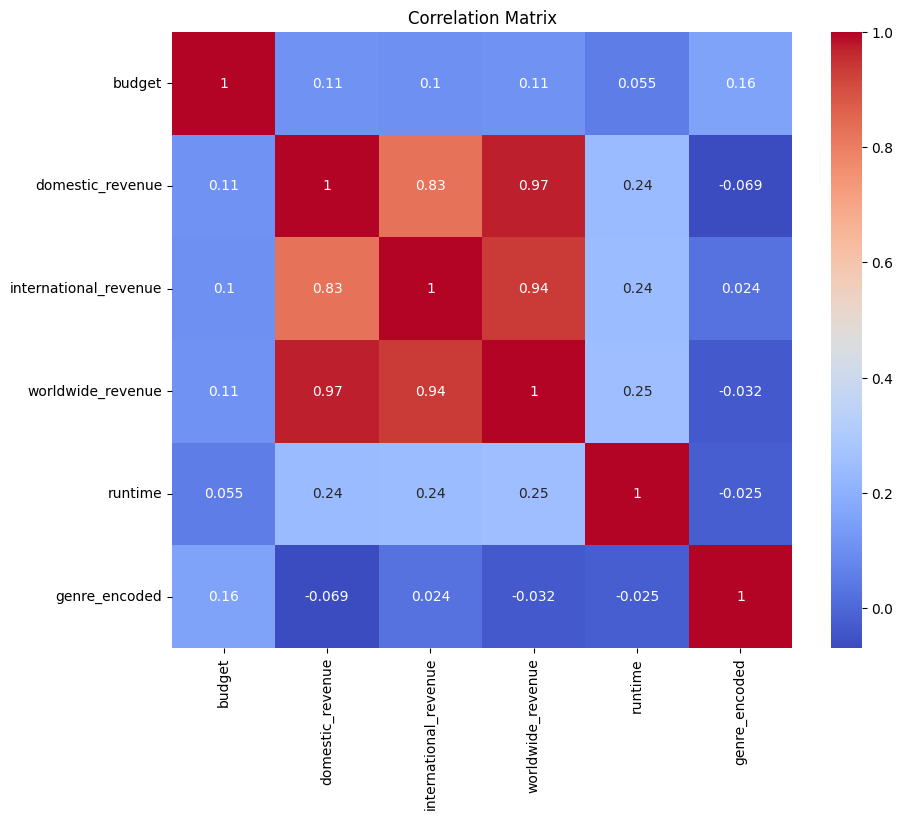

In [67]:
df_matrix=df.corr()
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [68]:


def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(df, 0.7)
len(set(corr_features))
corr_features

<ipython-input-68-5fc0b346164a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


{'international_revenue', 'worldwide_revenue'}

In [69]:
df=df.drop(columns=['director','international_revenue', 'worldwide_revenue'])
df.head(10)

,title,release_date,genre,budget,domestic_revenue,runtime,MPAA_rating,genre_encoded
0,20th Century Women,12/28/2016,"Comedy, Drama",7000000.0,5664764.0,119,R,5
1,A Ghost Story,7/7/2017,"Drama, Fantasy",100000.0,1596371.0,92,R,22
3,A Most Violent Year,12/31/2014,"Crime, Drama",20000000.0,5749134.0,125,R,12
6,American Honey,9/30/2016,"Drama, Adventure",3500000.0,663246.0,163,R,17
7,Amy,7/3/2015,"Documentary, Biographical, Music",3400000.0,8413144.0,128,R,15
9,Barely Lethal,5/29/2015,"Action, Comedy",15000000.0,6075.0,96,PG-13,0
12,Climax,3/1/2019,"Horror, Drama, Music",2900000.0,817339.0,97,R,30
13,C'mon C'mon,11/19/2021,"Drama, B/W",8300000.0,1863674.0,109,R,18
15,Dark Places,8/7/2015,"Mystery, Thriller",20000000.0,208588.0,113,R,38
17,Eighth Grade,7/13/2018,"Comedy, Drama, Coming-of-age",2000000.0,13539709.0,93,R,7


In [70]:
from sklearn.preprocessing import StandardScaler
numeric_features = ['budget', 'domestic_revenue', 'runtime', 'genre_encoded']
numeric_data = df[numeric_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric data
scaled_data = scaler.fit_transform(numeric_data)

# Create a new DataFrame with the scaled data
df1 = pd.DataFrame(scaled_data, columns=numeric_features)

# Display the first 5 rows of the new DataFrame
print(df1.head())

     budget  domestic_revenue   runtime  genre_encoded
0 -0.103505         -0.243492  0.709193      -1.208534
1 -0.757376         -0.550962 -0.861665       0.164294
2  1.128426         -0.237115  1.058272      -0.643252
3 -0.435179         -0.621483  3.269109      -0.239479
4 -0.444655         -0.035782  1.232812      -0.400988


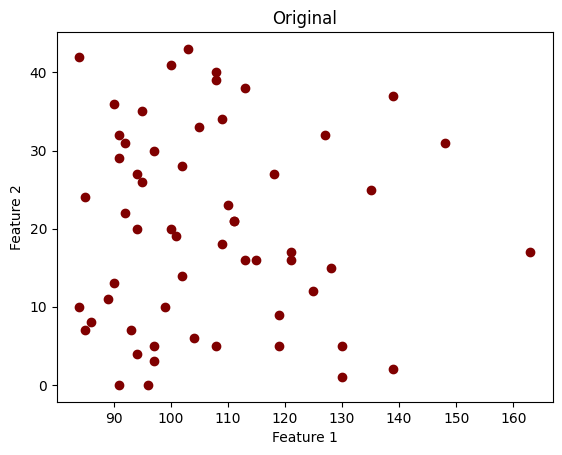

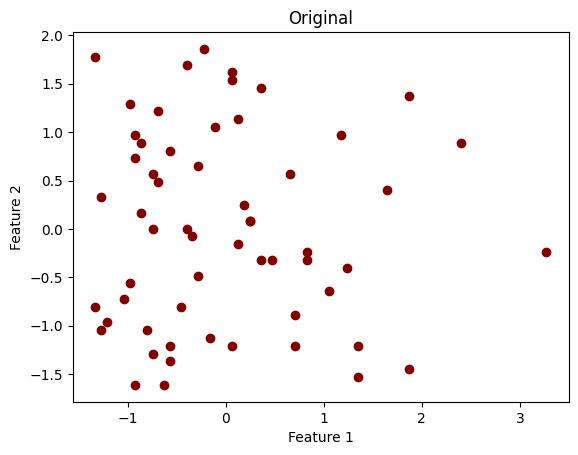

In [76]:
import matplotlib.pyplot as plt
plt.scatter(df['runtime'], df['genre_encoded'],c='maroon')
plt.title("Original")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
plt.scatter(df1['runtime'], df1['genre_encoded'],c='maroon')
plt.title("Original")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


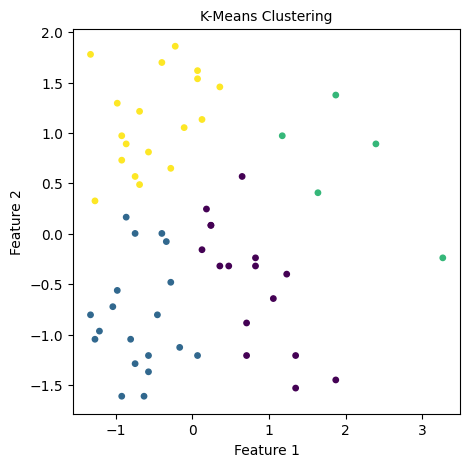

Silhouette Score (K-Means): 0.44329433075081015
Davies-Bouldin Index (K-Means): 0.8057846099556759
Calinski-Harabasz Index (K-Means): 52.43516412219026


In [73]:
from sklearn.cluster import KMeans
import matplotlib
k_means=KMeans(n_clusters=4,random_state=42)
selected_features = df1[['runtime', 'genre_encoded']]

kmeans_lab=k_means.fit_predict(selected_features)

# Plotting K Means
df1['KMeans_labels']=k_means.labels_

# Plotting resulting clusters

plt.figure(figsize=(5,5))
plt.scatter(df1['runtime'],df1['genre_encoded'],c=df1['KMeans_labels'],s=15)
plt.title('K-Means Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()
#score
silhouette_avg_kmeans = silhouette_score(df1[['runtime','genre_encoded']], kmeans_lab)
print("Silhouette Score (K-Means):", silhouette_avg_kmeans)
davies_bouldin_kmeans = davies_bouldin_score(df1[['runtime','genre_encoded']], kmeans_lab)
calinski_harabasz_kmeans = calinski_harabasz_score(df1[['runtime','genre_encoded']], kmeans_lab)
print("Davies-Bouldin Index (K-Means):", davies_bouldin_kmeans)
print("Calinski-Harabasz Index (K-Means):", calinski_harabasz_kmeans)

Hierarchical

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


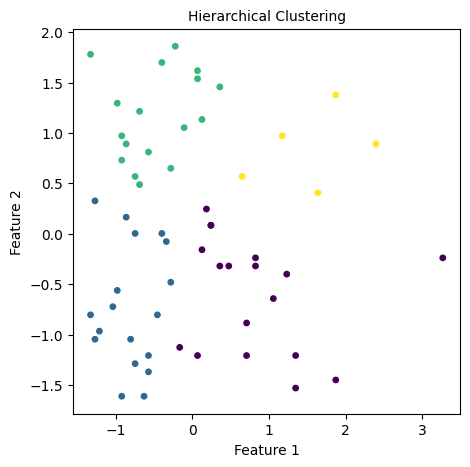

Silhouette Score : 0.3929938230622638
Davies-Bouldin Index: 0.8372654637192298
Calinski-Harabasz Index : 43.40682176417099


In [77]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
hierarchy=model.fit_predict(df1[['runtime','genre_encoded']])

# Plotting Hierarchical Clustering
df1['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(df1['runtime'],df1['genre_encoded'],c=df1['HR_labels'],s=15)
plt.title('Hierarchical Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()
silhouette_avg_hierarchy = silhouette_score(df1[['runtime','genre_encoded']], hierarchy)
print("Silhouette Score :", silhouette_avg_hierarchy)
davies_bouldin_kmeans = davies_bouldin_score(df1[['runtime','genre_encoded']], hierarchy)
calinski_harabasz_kmeans = calinski_harabasz_score(df1[['runtime','genre_encoded']], hierarchy)
print("Davies-Bouldin Index:", davies_bouldin_kmeans)
print("Calinski-Harabasz Index :", calinski_harabasz_kmeans)

DBSCAN

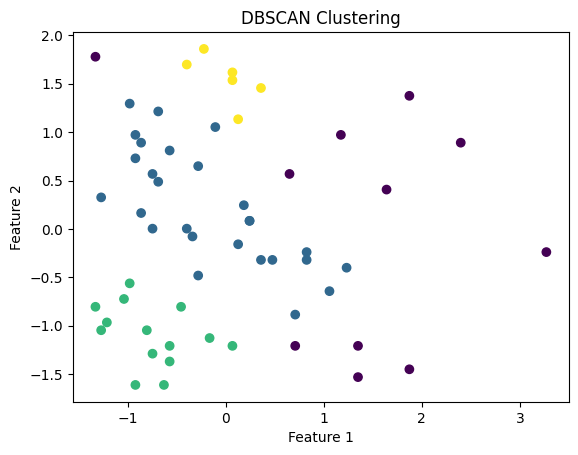

In [78]:
# Initialize DBSCAN
from sklearn.cluster import DBSCAN
eps = 0.5       # Radius of the neighborhood
min_samples = 5 # Minimum number of samples in a neighborhood to be a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit DBSCAN to the data
labels = dbscan.fit_predict(df1[['runtime','genre_encoded']])

# Visualize the clusters and noise
plt.scatter(df1['runtime'], df1['genre_encoded'], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


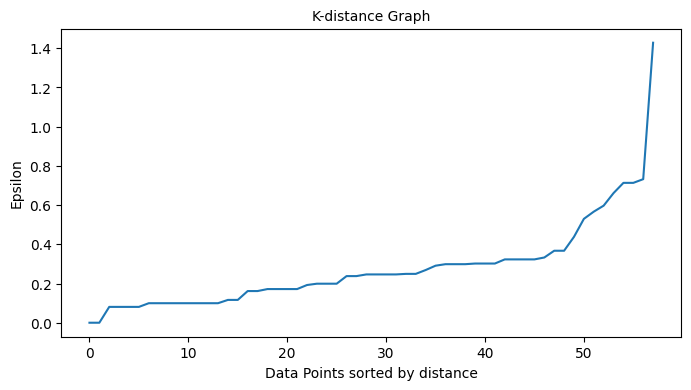

In [80]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df1[['runtime','genre_encoded']])
distances, indices = nbrs.kneighbors(df1[['runtime','genre_encoded']])

# The distance variable contains an array of distances between a data point and
# its nearest data point for all data points in the dataset.

# Let’s plot our K-distance graph and find the value of epsilon. Use the following syntax:

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

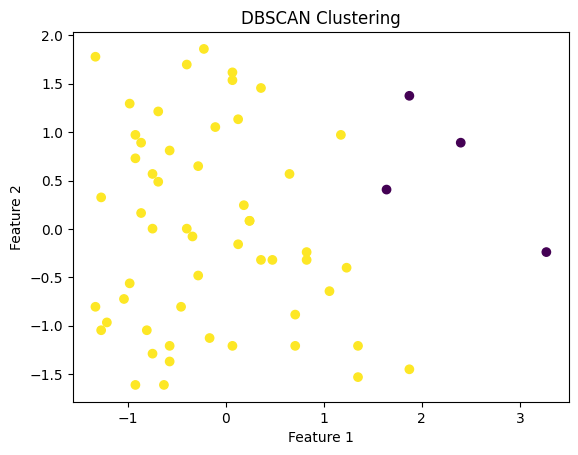

Silhouette Score: 0.39740977223107926
Davies-Bouldin Index: 0.771315746493925
Calinski-Harabasz Index : 14.771185350456996


In [86]:
  # Radius of the neighborhood
min_samples = 5 # Minimum number of samples in a neighborhood to be a core point
eps=0.7



dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(df1[['runtime','genre_encoded']])


# Visualize the clusters and noise
plt.scatter(df1['runtime'], df1['genre_encoded'], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
silhouette_avg_dbscan = silhouette_score(df1[['runtime','genre_encoded']], labels)
print("Silhouette Score:", silhouette_avg_dbscan)
davies_bouldin_kmeans = davies_bouldin_score(df1[['runtime','genre_encoded']], labels)
calinski_harabasz_kmeans = calinski_harabasz_score(df1[['runtime','genre_encoded']], labels)
print("Davies-Bouldin Index:", davies_bouldin_kmeans)
print("Calinski-Harabasz Index :", calinski_harabasz_kmeans)

In [88]:
cluster_labels = k_means.labels_
user_input_movie = input("Enter your favorite movie: ")

# Find the cluster label of the user's input movie
user_input_index = df[df['title'] == user_input_movie].index[0]
user_input_cluster = cluster_labels[user_input_index]

# Get movie recommendations from the same cluster
recommendations = df[cluster_labels == user_input_cluster]

# Display recommended movies
print("Recommended Movies:")
for movie_title in recommendations['title']:
    print(movie_title)



Enter your favorite movie: Lady Bird
Recommended Movies:
20th Century Women
A Most Violent Year
Amy
C'mon C'mon
Everything Everywhere All At Once
First Reformed
Lean on Pete
Minari
Moonlight
Red Rocket
Room
The Florida Project
The Green Knight
The Last Black Man in San Francisco
The Lobster
The Sea of Trees
